In [ ]:
"""
Interpolation de Lagrange
"""

In [1]:
"""
librairies et fonctions
"""
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
     """
     fonction a tester
     """
     epsilon = 1.e-1
     return math.exp(-x**2/(2.*epsilon))


In [3]:
def Lagrange_pol(i,x,noeuds):
    """
    i-eme polynome (de base) de Lagrange pour les noeuds choisis
    """
    val = 1.
    for j in range(len(noeuds)):
        if not j == i:
           val *= (x-noeuds[j])/(noeuds[i]-noeuds[j])
    return val
    
def Lagrange_app(x,noeuds):
    """
    approximation de Lagrange de degree i aux noeud choisis, au point x
    """
    val = 0.
    for i in range(0,len(noeuds)):
        val += f(noeuds[i]) * Lagrange_pol(i,x,noeuds)  
    return val

def repartition_points(x_min,xmax,N_noeuds):
    """
    construction des noeuds pour l'interpolation de Lagrange
    """
    pi  = 2. * math.acos(0.)
    val = np.zeros(N_noeuds)
    for i in range(0,N_noeuds):
        #val[i] = x_min + (i*1.) * (x_max-x_min) / (N_noeuds-1.)
        val[i] = (x_min + x_max)/2. + math.cos((i+1.)*pi/(N_noeuds+1.)) * (x_max-x_min)/2.
    return val

In [4]:

"""
domaine de definition et nombre de points de visualisation
"""
x_min    = -1.
x_max    =  1.

N_points = 1000


In [18]:
"""
construction du maillage et calculs de f et de son interpolation
"""
grid     = [x_min + (i*1.)*(x_max-x_min)/(N_points*1.) for i in range(0,N_points+1)]
vals_f   = [f(grid[i]) for i in range(0,N_points+1)]

N_noeuds = 6

grid_Lag = repartition_points(x_min,x_max,N_noeuds)
vals_app = [Lagrange_app(grid[i],grid_Lag) for i in range(0,N_points+1)]    
err      = [vals_f[i] - vals_app[i] for i in range(0,N_points+1)]

for i in range(0,N_noeuds):
     print('{:02d}'.format(i), '{:.4}'.format('   '), 
           "x_i", '{:+f}'.format(grid_Lag[i]), '{:.4}'.format('  '),  
           "f(x_i)", '{:f}'.format(f(grid_Lag[i])), '{:.4}'.format('  '), 
           "I_N f(x_i)", '{:f}'.format(Lagrange_app(grid_Lag[i],grid_Lag))
          )



00     x_i +0.900969    f(x_i) 0.017271    I_N f(x_i) 0.017271
01     x_i +0.623490    f(x_i) 0.143174    I_N f(x_i) 0.143174
02     x_i +0.222521    f(x_i) 0.780689    I_N f(x_i) 0.780689
03     x_i -0.222521    f(x_i) 0.780689    I_N f(x_i) 0.780689
04     x_i -0.623490    f(x_i) 0.143174    I_N f(x_i) 0.143174
05     x_i -0.900969    f(x_i) 0.017271    I_N f(x_i) 0.017271


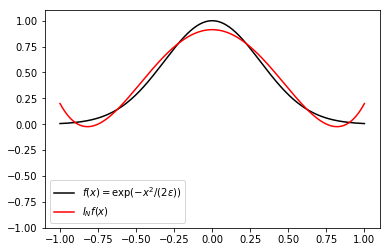

In [19]:
  
"""
figure 1 : f et son approximation
"""
fig1 = plt.figure(1)
plt.axis([-1.1, 1.1, -1., 1.1])
plt.plot(grid, vals_f  , color='black'  , label='$f(x)=\exp(-x^2/(2\epsilon))$'  )
plt.plot(grid, vals_app, color='red', label='$I_N f(x)$')
plt.legend()
plt.show()
# fig1.savefig('f_et_INf.png')

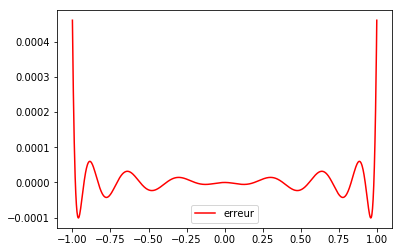

In [10]:
"""
figure 2 : erreur
"""
fig2   = plt.figure(2)
plt.plot(grid, err, color='red'  , label='erreur'  )
plt.legend()
plt.show()
#fig2.savefig('err.png')

In [11]:
"""
calcul de l'erreur L2 et L_infini discrete 
"""
N = 40
err_L2      = np.zeros(N-1)
err_Linfini = np.zeros(N-1)
grid_err    = np.zeros(N-1)

vals_f   = [f(grid[i]) for i in range(0,N_points+1)]  

for j in range(0,N-1):
     grid_Lag = repartition_points(x_min,x_max,j+2)
     vals_app = [Lagrange_app(grid[i],grid_Lag) for i in range(0,N_points+1)]    
     
     err            = [abs(vals_f[i] - vals_app[i]) for i in range(0,N_points+1)]

     err_L2[j]      = np.sqrt(np.dot(err,err)*(x_max-x_min)/math.ceil(N_points))
     err_Linfini[j] = np.amax(err)

     grid_err[j]    = j+2

    

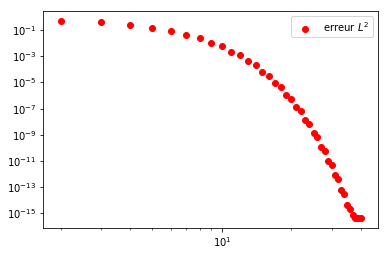

In [14]:
"""
figure 3 : erreur L2 
"""
fig3   = plt.figure(3)
plt.xscale('log')
plt.yscale('log')
#plt.axis([1., N, 0.46, 0.51])
plt.scatter(grid_err, err_L2, color='red'  , label='erreur $L^2$'  )
plt.legend()
plt.show()
# fig3.savefig('err_L2.png')


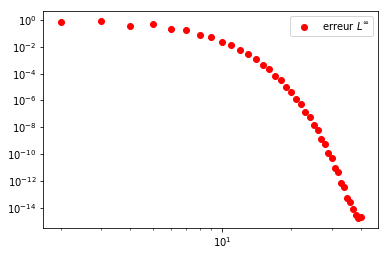

In [13]:
"""
figure 4 : erreur L_infini
"""
fig4   = plt.figure(4)
plt.xscale('log')
plt.yscale('log')
#plt.axis([1., N, 0.46, 0.51])
plt.scatter(grid_err, err_Linfini, color='red'  , label='erreur $L^\infty$'  )
plt.legend()
plt.show()
#fig4.savefig('err_Linfini.png')
